In [70]:
import numpy as np
import pandas as pd
import math
import pandas_datareader as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [71]:
df = web.DataReader('NFLX',data_source='yahoo',start='2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,10.388572,10.018572,10.040000,10.320000,29213800.0,10.320000
2012-01-04,11.567142,10.258572,10.335714,11.492857,100489900.0,11.492857
2012-01-05,11.694285,11.040000,11.345715,11.328571,86552900.0,11.328571
2012-01-06,12.471429,11.242857,11.302857,12.327143,125610800.0,12.327143
2012-01-09,14.235714,12.448571,12.801429,14.025714,214073300.0,14.025714
...,...,...,...,...,...,...
2019-12-11,299.429993,294.200012,294.489990,298.929993,5589800.0,298.929993
2019-12-12,299.170013,295.059998,295.670013,298.440002,4766600.0,298.440002
2019-12-13,301.799988,297.250000,298.500000,298.500000,3879700.0,298.500000


In [72]:
df.shape

(2003, 6)

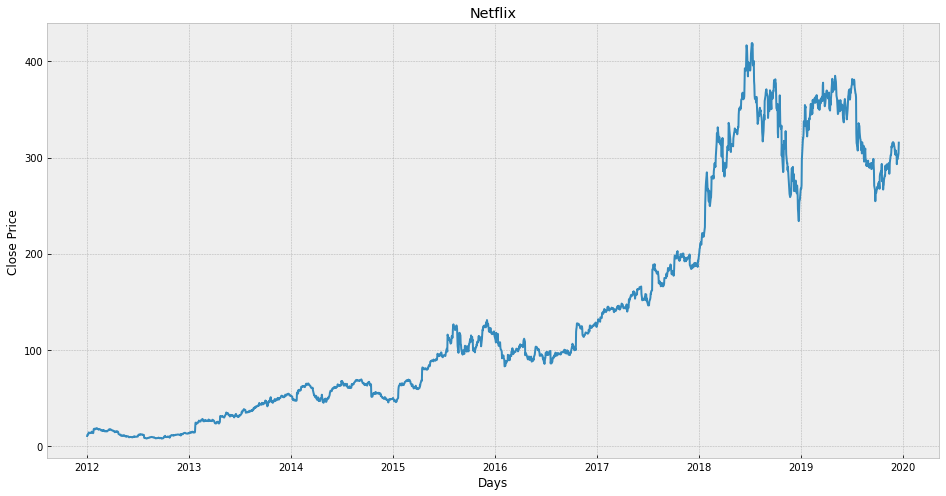

In [73]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [74]:
df=df.filter(['Close'])
df.head(4)

,Close
Date,
2012-01-03,10.320000
2012-01-04,11.492857
2012-01-05,11.328571
2012-01-06,12.327143


In [78]:

f_d = 250
df['Prediction']=df['Close'].shift(-f_d)
df.tail(4)

,Close,Prediction
Date,,
2019-12-12,298.440002,NaN
2019-12-13,298.500000,NaN
2019-12-16,304.209991,NaN
2019-12-17,315.480011,NaN


In [79]:
X = np.array(df.drop(['Prediction'], 1))[:-f_d]
print(X)

[[ 10.31999969]
 [ 11.49285698]
 [ 11.32857132]
 ...
 [262.79998779]
 [270.94000244]
 [266.76998901]]


In [80]:
y = np.array(df['Prediction'])[:-f_d]
print(y)

[ 13.14428616  13.79857159  13.71142864 ... 298.5        304.20999146
 315.48001099]


In [81]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [82]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr= LinearRegression().fit(x_train,y_train)

In [83]:
x_f = df.drop(['Prediction'],1)[:-f_d]
x_f=x_f.tail(f_d)
x_f=np.array(x_f)
x_f

array([[188.61999512],
       [189.94000244],
       [187.75999451],
       [186.24000549],
       [192.71000671],
       [191.96000671],
       [201.07000732],
       [205.05000305],
       [205.63000488],
       [209.99000549],
       [212.05000305],
       [209.30999756],
       [212.52000427],
       [217.24000549],
       [221.22999573],
       [221.52999878],
       [217.5       ],
       [220.33000183],
       [220.46000671],
       [227.58000183],
       [250.28999329],
       [261.29998779],
       [269.70001221],
       [274.6000061 ],
       [284.58999634],
       [278.79998779],
       [270.29998779],
       [265.07000732],
       [267.42999268],
       [254.25999451],
       [265.72000122],
       [264.55999756],
       [250.1000061 ],
       [249.47000122],
       [257.95001221],
       [258.26998901],
       [266.        ],
       [280.26998901],
       [278.51998901],
       [278.54998779],
       [281.04000854],
       [278.14001465],
       [285.92999268],
       [294

In [84]:
tree_p =tree.predict(x_f)
print(tree_p)
print()
lr_p=lr.predict(x_f)
print(lr_p)

[260.57998657 266.83999634 233.88000488 350.3500061  255.57000732
 256.07998657 309.1000061  267.66000366 271.20001221 297.57000732
 315.33999634 320.26998901 319.95999146 354.64001465 337.58999634
 337.58999634 354.64001465 351.39001465 353.19000244 339.1000061
 325.16000366 321.98999023 326.67001343 338.04998779 335.66000366
 328.8999939  340.66000366 339.5        339.8500061  351.33999634
 351.76998901 352.19000244 344.70999146 347.57000732 345.73001099
 345.73001099 351.76998901 359.07000732 356.86999512 356.86999512
 359.91000366 356.97000122 363.01998901 363.91000366 364.97000122
 362.86999512 358.1000061  357.32000732 351.04000854 356.80499268
 359.60998535 352.6000061  349.6000061  358.85998535 356.26998901
 358.85998535 358.82000732 361.45999146 363.44000244 358.77999878
 375.22000122 377.86999512 361.01000977 366.23001099 359.97000122
 353.36999512 354.60998535 356.55999756 304.32000732 367.72000122
 369.75       367.72000122 365.48999023 361.41000366 364.70999146
 363.920013

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


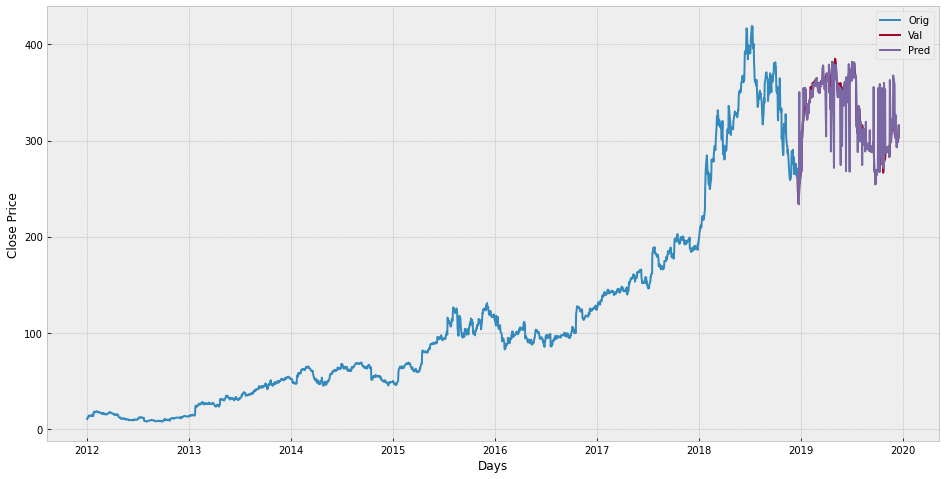

In [85]:
pr =tree_p
valid = df[X.shape[0]:]
valid['Predictions']=pr
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


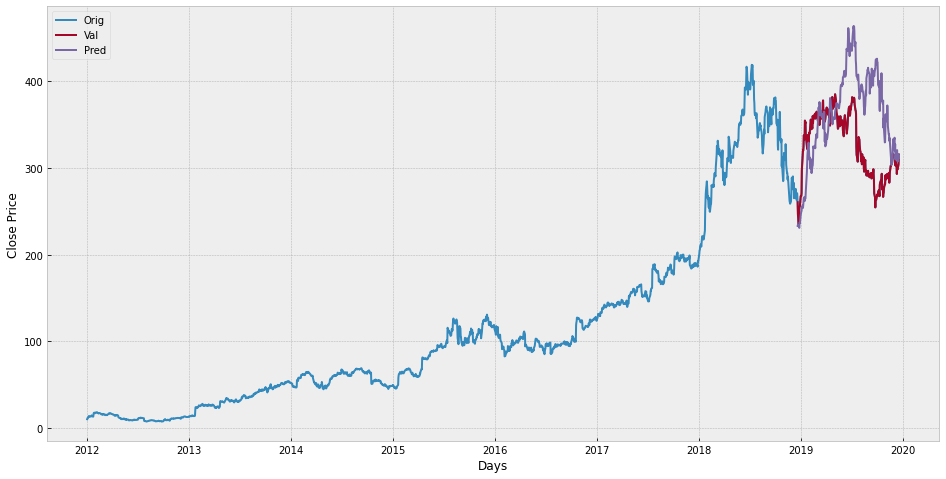

In [86]:
pr =lr_p
valid = df[X.shape[0]:]
valid['Predictions']=pr
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()